# Deep Learning Assignment - 2

## Name: Sanyam Kaul
## Roll Number: CS23MTECH14011

---

In [1]:
from PIL import Image
from IPython.display import display, HTML
import base64
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def display_input_image(input_image):
    plt.imshow(input_image)
    plt.title('Input Image')
    plt.show()


In [3]:
def display_filter_kernel(filter_kernel):
    plt.imshow(filter_kernel[:, :, 0], cmap='gray')  # Displaying the first channel of the filter kernel
    plt.title('Filter Kernel')
    plt.show()

In [4]:
def display_output_activation(output_activation, name):
    plt.imshow(output_activation[:, :, 0], cmap='gray')  # Displaying the first channel of the output activation map
    plt.title(name)
    plt.show()

## Q1

In [5]:
def pad_input(input_image, padding):
    if padding > 0:
        return np.pad(input_image, [(padding, padding), (padding, padding), (0, 0)], mode='constant')
    else:
        return input_image

In [6]:
def calculate_output_dimensions(input_height, input_width, kernel_height, kernel_width, padding, stride):
    output_height = (input_height - kernel_height + 2 * padding) // stride + 1
    output_width = (input_width - kernel_width + 2 * padding) // stride + 1
    return output_height, output_width

In [7]:
def initialize_output_activation(output_height, output_width):
    return np.zeros((output_height, output_width, 1))

In [8]:
def perform_convolution(input_image, filter_kernel, stride, output_activation):
    input_height, input_width, input_channels = input_image.shape
    kernel_height, kernel_width, kernel_channels = filter_kernel.shape
    
    for i in range(0, input_height - kernel_height + 1, stride):
        for j in range(0, input_width - kernel_width + 1, stride):
            patch = input_image[i:i+kernel_height, j:j+kernel_width, :]
            output_activation[i//stride, j//stride, 0] = np.sum(patch * filter_kernel)
    
    return output_activation

In [9]:
def apply_activation_function(output_activation, activation):
    if activation == 'sigmoid':
        return 1 / (1 + np.exp(-output_activation))
    elif activation == 'tanh':
        return np.tanh(output_activation)
    elif activation == 'relu':
        return np.maximum(0, output_activation)
    elif activation == 'leaky_relu':
        return np.maximum(0.1 * output_activation, output_activation)

In [10]:
def convolution(input_image, filter_kernel, stride=1, padding=0, activation='relu'):
    padded_input = pad_input(input_image, padding)
    
    input_height, input_width, _ = padded_input.shape
    kernel_height, kernel_width, _ = filter_kernel.shape
    
    output_height, output_width = calculate_output_dimensions(input_height, input_width, kernel_height, kernel_width, padding, stride)
    
    output_activation = initialize_output_activation(output_height, output_width)
    
    output_activation = perform_convolution(padded_input, filter_kernel, stride, output_activation)
    
    return apply_activation_function(output_activation, activation)


In [11]:
def import_image(image_path):
    input_image_pil = Image.open(image_path)

    # Convert the image to a NumPy array
    input_image = np.array(input_image_pil)
    print(f"input image shape - {input_image.shape}")
    # Ensure the image has 3 channels
    if len(input_image.shape) == 2:  # If the image is grayscale, convert it to RGB
        input_image = np.stack((input_image,) * 3, axis=-1)
    
    # Resize the image to match the desired dimensions
    input_image = np.array(input_image_pil.resize((500, 500)))
    print(f"Resized input image size {input_image.shape}")

    # Normalize pixel values to the range [0, 1]
    input_image = input_image / 255.0
    
    return input_image

input image shape - (3722, 3840, 3)
Resized input image size (500, 500, 3)


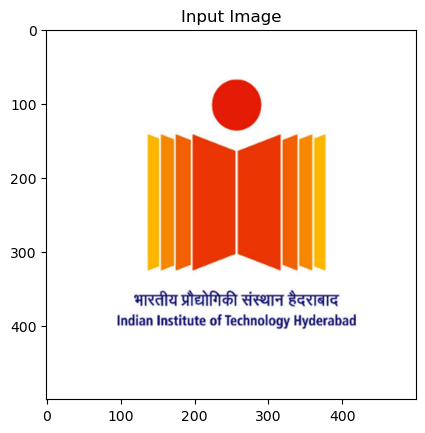

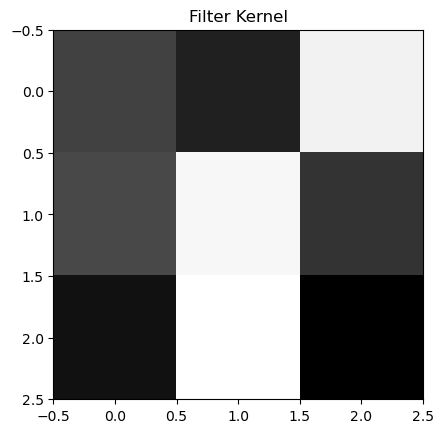

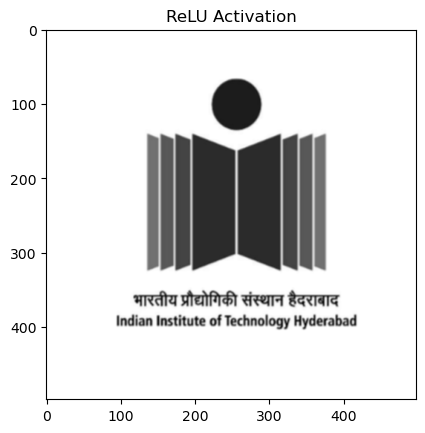

In [12]:
# Define input image (e.g., IITH logo)
input_image = import_image("IITH-logo.png")

# Define filter kernel (e.g., random kernel volume)
filter_kernel = np.random.rand(3, 3, 3)  # Example random filter kernel, replace with actual kernel

# Display input image
display_input_image(input_image)

# Display filter kernel
display_filter_kernel(filter_kernel)

# Perform convolution with ReLU activation
output_activation = convolution(input_image, filter_kernel, activation='relu')

# Display output activation map
display_output_activation(output_activation, "ReLU Activation")


## Q2 

In [13]:
activation_map = output_activation

In [14]:
def display_pooled_output(pooled_output):
    plt.imshow(pooled_output[:, :, 0], cmap='gray')  # Displaying the first channel of the pooled output
    plt.title('Pooled Output')
    plt.show()

In [15]:
def calculate_output_dimensions(input_height, input_width, pool_size, stride):
    pool_height, pool_width = pool_size
    output_height = (input_height - pool_height) // stride + 1
    output_width = (input_width - pool_width) // stride + 1
    return output_height, output_width

In [16]:
def perform_max_pooling(activation_map, pool_size, stride):
    input_height, input_width, num_channels = activation_map.shape
    pool_height, pool_width = pool_size
    output_height, output_width = calculate_output_dimensions(input_height, input_width, pool_size, stride)
    
    pooled_output = np.zeros((output_height, output_width, num_channels))
    
    for i in range(0, input_height - pool_height + 1, stride):
        for j in range(0, input_width - pool_width + 1, stride):
            patch = activation_map[i:i+pool_height, j:j+pool_width, :]
            pooled_output[i//stride, j//stride, :] = np.amax(patch, axis=(0, 1))
    
    return pooled_output

In [17]:
def max_pooling(activation_map, pool_size=(2, 2), stride=2):
    return perform_max_pooling(activation_map, pool_size, stride)

In [18]:
# Perform max pooling with a pool size of (2, 2) and stride of 2
pooled_output = max_pooling(activation_map, pool_size=(2, 2), stride=2)

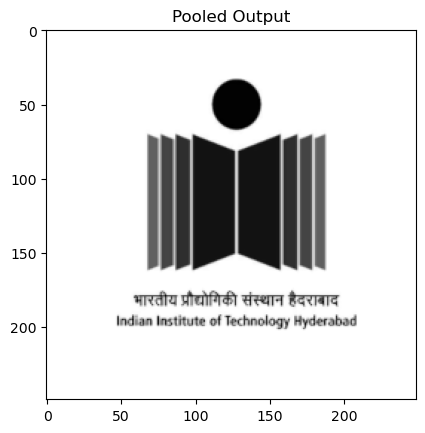

In [19]:
# Display pooled output
display_pooled_output(pooled_output)

## Q3

In [20]:
def display_filter_kernels2(filter_kernels):
    fig, axes = plt.subplots(nrows=filter_kernels.shape[3], ncols=filter_kernels.shape[2], figsize=(8, 8))
    for i in range(filter_kernels.shape[3]):
        for j in range(filter_kernels.shape[2]):
            axes[i, j].imshow(filter_kernels[:, :, j, i], cmap='gray')
            axes[i, j].set_title(f'Kernel {i + 1} - Channel {j + 1}')
            axes[i, j].axis('off')
    plt.show()


In [21]:
def pad_input_volume(input_volume, padding):
    if padding > 0:
        return np.pad(input_volume, [(padding, padding), (padding, padding), (0, 0)], mode='constant')
    return input_volume

In [22]:
def initialize_filter_kernels(kernel_size, input_channels, num_filters):
    kernel_height, kernel_width = kernel_size
    return np.random.rand(kernel_height, kernel_width, input_channels, num_filters)

In [23]:
def perform_convolution_operation(input_volume, num_filters, filter_kernels, kernel_size, stride):
    input_height, input_width, input_channels = input_volume.shape
    kernel_height, kernel_width = kernel_size
    output_height = (input_height - kernel_height) // stride + 1
    output_width = (input_width - kernel_width) // stride + 1
    output_volume = np.zeros((output_height, output_width, num_filters))
    
    for f in range(num_filters):
        for i in range(0, input_height - kernel_height + 1, stride):
            for j in range(0, input_width - kernel_width + 1, stride):
                patch = input_volume[i:i+kernel_height, j:j+kernel_width, :]
                output_volume[i//stride, j//stride, f] = np.sum(patch * filter_kernels[:, :, :, f])
    
    return output_volume

In [24]:
def apply_activation_function(output_volume, activation):
    if activation == 'sigmoid':
        return 1 / (1 + np.exp(-output_volume))
    elif activation == 'tanh':
        return np.tanh(output_volume)
    elif activation == 'relu':
        return np.maximum(0, output_volume)
    elif activation == 'leaky_relu':
        return np.maximum(0.1 * output_volume, output_volume)
    return output_volume

In [25]:
def convolution_layer(input_volume, num_filters, kernel_size, stride=1, padding=0, activation='relu'):
    padded_input_volume = pad_input_volume(input_volume, padding)
    filter_kernels = initialize_filter_kernels(kernel_size, input_volume.shape[2], num_filters)
    output_volume = perform_convolution_operation(padded_input_volume, num_filters, filter_kernels, kernel_size, stride)
    output_volume = apply_activation_function(output_volume, activation)
    
    return output_volume, filter_kernels

input image shape - (3722, 3840, 3)
Resized input image size (500, 500, 3)


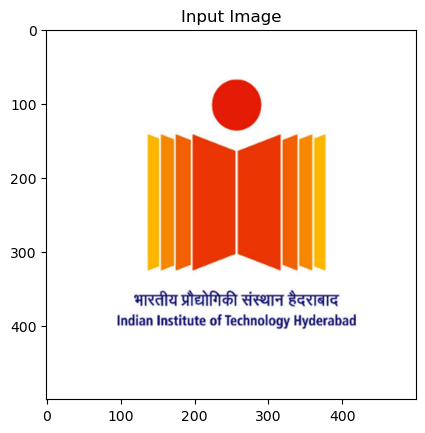

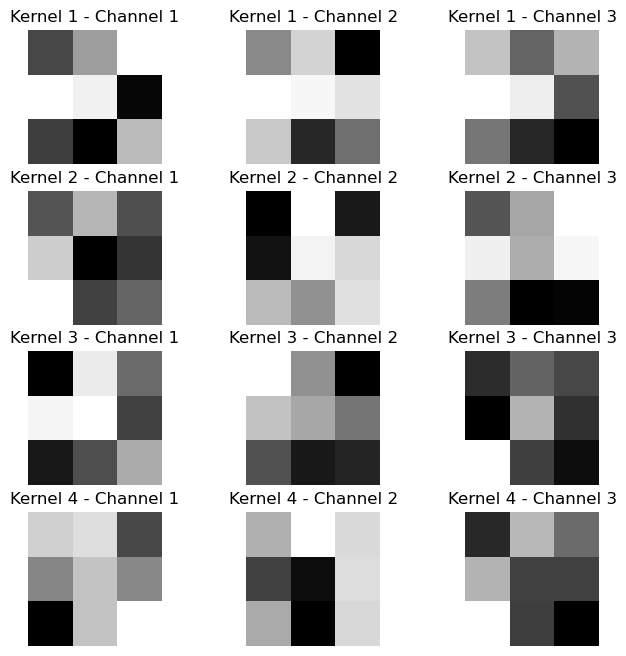

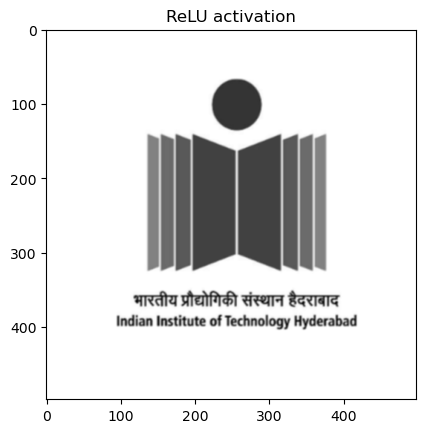

In [26]:
# Example input volume (e.g., image or activation maps)
input_volume = import_image("IITH-logo.png")

# Display input volume
display_input_image(input_volume)

# Perform convolutional layer operation with 4 filters, kernel size (3, 3), and ReLU activation
output_volume, filter_kernels = convolution_layer(input_volume, 4, (3, 3), activation='relu')

# Display filter kernels
display_filter_kernels2(filter_kernels)

# Display output volume
display_output_activation(output_volume, "ReLU activation")

## Q4

In [27]:
def calculate_output_dimensions(input_height, input_width, pool_size, stride):
    pool_height, pool_width = pool_size
    output_height = (input_height - pool_height) // stride + 1
    output_width = (input_width - pool_width) // stride + 1
    return output_height, output_width

In [28]:
def perform_average_pooling(activation_map_volume, pool_size, stride):
    input_height, input_width, num_channels = activation_map_volume.shape
    pool_height, pool_width = pool_size
    output_height, output_width = calculate_output_dimensions(input_height, input_width, pool_size, stride)
    
    pooled_output_volume = np.zeros((output_height, output_width, num_channels))
    
    for i in range(0, input_height - pool_height + 1, stride):
        for j in range(0, input_width - pool_width + 1, stride):
            patch = activation_map_volume[i:i+pool_height, j:j+pool_width, :]
            pooled_output_volume[i//stride, j//stride, :] = np.mean(patch, axis=(0, 1))
    
    return pooled_output_volume

In [29]:
def average_pooling(activation_map_volume, pool_size=(2, 2), stride=2):
    return perform_average_pooling(activation_map_volume, pool_size, stride)

In [30]:
def global_average_pooling(activation_map_volume):
    return np.mean(activation_map_volume, axis=(0, 1))

input image shape - (3722, 3840, 3)
Resized input image size (500, 500, 3)


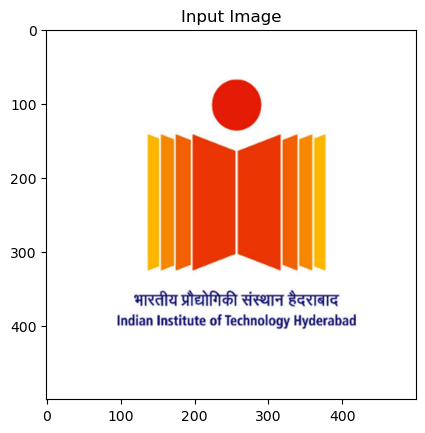

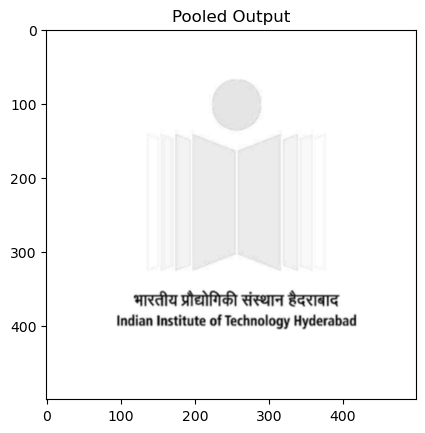

Global Average Pooled Output: [0.97371631 0.87669401 0.82618565]


In [31]:
# Example input activation map volume
# activation_map_volume = output_volume
image = import_image("IITH-logo.png")
display_input_image(image)

# Perform average pooling with a pool size of (2, 2) and stride of 2
pooled_output_volume_avg = average_pooling(image, pool_size=(2, 2), stride=1)

# Display pooled output volume (average pooling)
display_pooled_output(pooled_output_volume_avg)

# Perform global average pooling
pooled_output_global_avg = global_average_pooling(image)

# Display global average pooled output
print("Global Average Pooled Output:", pooled_output_global_avg)

## Q5

In [32]:
def relu(x):
    return np.maximum(0, x)

In [33]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [34]:
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))  # For numerical stability
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

In [35]:
def initialize_parameters(input_size, hidden_layer_sizes, output_size):
    layer_sizes = [input_size] + hidden_layer_sizes + [output_size]
    parameters = {}
    for i in range(1, len(layer_sizes)):
        parameters[f'W{i}'] = np.random.randn(layer_sizes[i-1], layer_sizes[i]) * 0.01
        parameters[f'b{i}'] = np.zeros((1, layer_sizes[i]))
    return parameters

In [36]:
def forward_propagation(X, parameters, activation='relu'):
    caches = []
    A = X
    L = len(parameters) // 2  # Number of layers
    
    for i in range(1, L):
        W = parameters[f'W{i}']
        b = parameters[f'b{i}']
        Z = np.dot(A, W) + b
        if activation == 'relu':
            A = relu(Z)
        elif activation == 'sigmoid':
            A = sigmoid(Z)
        cache = (A, W, b, Z)
        caches.append(cache)
    
    # Output layer
    W = parameters[f'W{L}']
    b = parameters[f'b{L}']
    Z = np.dot(A, W) + b
    A_output = softmax(Z)
    cache_output = (A_output, W, b, Z)
    caches.append(cache_output)
    
    return A_output, caches

In [37]:
def mlp(X, hidden_layer_sizes, output_size, activation='relu', apply_softmax=False):
    input_size = X.shape[1]
    parameters = initialize_parameters(input_size, hidden_layer_sizes, output_size)
    A_output, _ = forward_propagation(X, parameters, activation)
    
    if apply_softmax:
        A_output = softmax(A_output)
    
    return A_output

In [38]:
# Example usage
X = np.random.randn(10, 1000)  # Example input vector with 10 samples and 100 features

# Specify MLP architecture
hidden_layer_sizes = [50, 30, 15]  # Two hidden layers with 50 and 30 units respectively
output_size = 10  # Output vector size

# Generate output vector with ReLU activation and without softmax
output_no_softmax = mlp(X, hidden_layer_sizes, output_size, activation='relu', apply_softmax=False)
print("Output without softmax:")
print(output_no_softmax)

# Generate output vector with sigmoid activation and with softmax
output_with_softmax = mlp(X, hidden_layer_sizes, output_size, activation='sigmoid', apply_softmax=True)
print("\nOutput with softmax:")
print(output_with_softmax)


Output without softmax:
[[0.10000002 0.09999746 0.09999968 0.10000054 0.09999921 0.09999991
  0.1000007  0.10000014 0.10000214 0.10000021]
 [0.0999996  0.09999482 0.10000078 0.1000012  0.0999997  0.09999956
  0.09999971 0.10000093 0.10000287 0.10000084]
 [0.09999883 0.09999426 0.10000157 0.10000096 0.100001   0.09999864
  0.09999907 0.10000147 0.1000021  0.1000021 ]
 [0.09999887 0.0999956  0.10000041 0.10000118 0.1000008  0.09999753
  0.09999887 0.10000284 0.10000197 0.10000195]
 [0.09999903 0.09999569 0.09999972 0.10000168 0.10000036 0.09999999
  0.0999989  0.10000047 0.10000277 0.1000014 ]
 [0.09999895 0.0999973  0.10000101 0.10000136 0.09999945 0.10000004
  0.09999882 0.10000014 0.10000152 0.10000142]
 [0.09999957 0.09999803 0.09999837 0.10000141 0.10000045 0.10000082
  0.09999825 0.09999917 0.10000213 0.1000018 ]
 [0.09999953 0.09999816 0.10000031 0.10000043 0.10000018 0.09999996
  0.0999997  0.09999984 0.10000104 0.10000085]
 [0.10000148 0.09999507 0.10000252 0.10000095 0.0999975 

## Q6

In [39]:
def CNN(input_image):
    # Convolution layer 1
    conv1_filters = 16
    conv1_kernel_size = (5, 5)
    conv1_output, conv1_kernels = convolution_layer(input_image, num_filters=conv1_filters, kernel_size=conv1_kernel_size, activation='relu')
    # Max pooling layer 1
    pool1_output = max_pooling(conv1_output, pool_size=(2, 2), stride=2)
    
    # Convolution layer 2
    conv2_filters = 32
    conv2_kernel_size = (3, 3)
    conv2_output, conv2_kernels = convolution_layer(pool1_output, num_filters=conv2_filters, kernel_size=conv2_kernel_size, activation='sigmoid')
    # Max pooling layer 2
    pool2_output = max_pooling(conv2_output, pool_size=(2, 2), stride=2)
    
    # Global Average Pooling layer
    gap_output = global_average_pooling(pool2_output)
    
    # Flatten output for MLP
    mlp_input = np.ravel(gap_output)
    
    # MLP layer
    mlp_output = mlp(mlp_input.reshape(1, -1), hidden_layer_sizes=[mlp_input.size], output_size=1000, activation='relu', apply_softmax=True)
    
    return mlp_output.ravel()


In [40]:
# Example usage
input_image = np.random.rand(224, 224, 3)  # Example random input image, replace with actual input image
output_vector = CNN(input_image)
print("Output vector shape:", output_vector.shape)

Output vector shape: (1000,)


input image shape - (375, 500, 3)
Resized input image size (500, 500, 3)


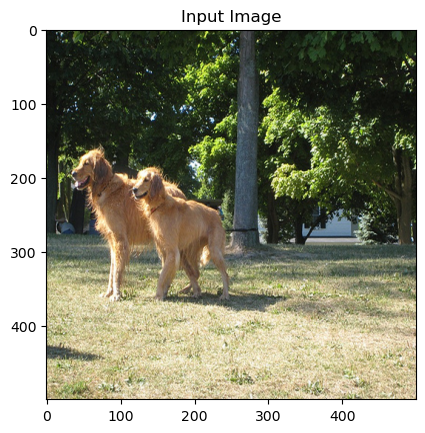

Output vector shape: (1000,)


In [41]:
input_image = import_image("ILSVRC2012_val_00049855.JPEG")
display_input_image(input_image)
output_vector = CNN(input_image)
print("Output vector shape:", output_vector.shape)

## Q7

In [42]:
# Activation function (sigmoid)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid
def sigmoid_derivative(x):
    return x * (1 - x)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - x**2

In [43]:
# Generate synthetic dataset
def generate_data(N):
    # Generate random values between 0 and 1 for column 0
    column_0 = np.random.rand(N)
    
    # Initialize column 1 with all zeros
    column_1 = np.zeros(N, dtype=int)
    
    count = 0
    while (count != 2):
        ind = random.randint(0, N - 1)
        column_1[ind] = 1
        count = count + 1
    
    return np.column_stack((column_0, column_1))

In [44]:
# Elman RNN class
class ElmanRNN:
    
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.elmon_losses = []
        
        # Initialize weights
        self.Wxh = np.random.randn(input_size, hidden_size) * 0.01  # input to hidden
        self.Whh = np.random.randn(hidden_size, hidden_size) * 0.01  # hidden to hidden
        self.Why = np.random.randn(hidden_size, output_size) * 0.01  # hidden to output
        
        # Initialize hidden state
        self.h = np.zeros((1, hidden_size))
    
    def forward(self, x):
        # Update hidden state
        self.h = np.tanh(np.dot(x, self.Wxh) + np.dot(self.h, self.Whh))
        
        # Compute output
        output = np.dot(self.h, self.Why)
        
        return output, self.h
    
    def backward(self, x, y, d_next, learn_rate):
        # Backpropagation through time
        d_output = y - d_next
        d_Why = np.dot(self.h.T, d_output)
        d_hidden = np.dot(d_output, self.Why.T) * (1 - self.h ** 2)
        d_Wxh = np.dot(x.T, d_hidden)
        d_Whh = np.dot(self.h.T, d_hidden)
        
        # Update weights
        self.Why -= learn_rate * d_Why
        self.Wxh -= learn_rate * d_Wxh
        self.Whh -= learn_rate * d_Whh
        
        # Return gradient for next time step
        return d_hidden
    
    def train(self, inputs, targets, num_epochs):
        for epoch in range(num_epochs):
            # Initialize hidden state for each epoch
            self.h = np.zeros((1, self.hidden_size))
            
            loss = 0
            sum = 0
            # Forward pass and backward pass for each sample
            for i in range(len(inputs)):
                x = inputs[i].reshape(1, self.input_size)
                y_true = target
                # Forward pass
                y_pred, self.h = self.forward(x)
                # Compute loss
                loss += np.mean((y_true - y_pred) ** 2)
                
                # Backward pass
                self.backward(x, y_pred, y_true, self.learning_rate)
                sum = y_pred
                
            if(epoch % 10 == 0):
                # Print average loss for each epoch
                print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss / len(inputs):.4f}')
                self.elmon_losses.append(loss)
        print(f'Final sum = {sum}')

In [45]:
class LSTM:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.lstm_losses = []
        
        # Initialize weights
        self.Wf = np.random.randn(input_size + hidden_size, hidden_size) * 0.01  # input and hidden to forget gate
        self.Wi = np.random.randn(input_size + hidden_size, hidden_size) * 0.01  # input and hidden to input gate
        self.Wo = np.random.randn(input_size + hidden_size, hidden_size) * 0.01  # input and hidden to output gate
        self.Wc = np.random.randn(input_size + hidden_size, hidden_size) * 0.01  # input and hidden to cell state
        
        self.Wy = np.random.randn(hidden_size, output_size) * 0.01  # hidden to output
        
        # Initialize biases
        self.bf = np.zeros((1, hidden_size))
        self.bi = np.zeros((1, hidden_size))
        self.bo = np.zeros((1, hidden_size))
        self.bc = np.zeros((1, hidden_size))
        self.by = np.zeros((1, output_size))
        
        # Initialize states
        self.h = np.zeros((1, hidden_size))
        self.c = np.zeros((1, hidden_size))
    
    def forward(self, x):
        # Concatenate input and previous hidden state
        combined_input = np.hstack((x, self.h))
        
        # Forget gate
        f = sigmoid(np.dot(combined_input, self.Wf) + self.bf)
        
        # Input gate
        i = sigmoid(np.dot(combined_input, self.Wi) + self.bi)
        
        # Output gate
        o = sigmoid(np.dot(combined_input, self.Wo) + self.bo)
        
        # Update cell state
        c_tilde = tanh(np.dot(combined_input, self.Wc) + self.bc)
        self.c = f * self.c + i * c_tilde
        
        # Update hidden state
        self.h = o * tanh(self.c)
        
        # Compute output
        output = np.dot(self.h, self.Wy) + self.by
        
        return output, self.h, self.c, o, f, i, c_tilde
    
    def backward(self, x, y, d_next, o, f, i, c_tilde, learn_rate):
        # Backpropagation through time
        d_output = y - d_next
        d_Wy = np.dot(self.h.T, d_output)
        d_by = np.sum(d_output, axis=0, keepdims=True)
        
        # Compute gradients for output gate
        d_o = d_output * tanh(self.c)
        d_o = sigmoid_derivative(d_o) * o
        
        # Compute gradients for cell state
        d_c = d_next * o * tanh_derivative(tanh(self.c))
        d_c = d_c + np.dot(d_output, self.Wy.T)
        
        # Compute gradients for forget gate
        d_f = d_c * self.c
        d_f = sigmoid_derivative(d_f) * f
        
        # Compute gradients for input gate
        d_i = d_c * c_tilde
        d_i = sigmoid_derivative(d_i) * i
        
        # Compute gradients for cell state candidate
        d_c_tilde = d_c * i
        d_c_tilde = tanh_derivative(d_c_tilde) * c_tilde
        
        # Concatenate input and previous hidden state
        combined_input = np.hstack((x, self.h))
        
        # Compute gradients for weights and biases
        d_Wf = np.dot(combined_input.T, d_f)
        d_Wi = np.dot(combined_input.T, d_i)
        d_Wo = np.dot(combined_input.T, d_o)
        d_Wc = np.dot(combined_input.T, d_c_tilde)
        
        d_bf = np.sum(d_f, axis=0, keepdims=True)
        d_bi = np.sum(d_i, axis=0, keepdims=True)
        d_bo = np.sum(d_o, axis=0, keepdims=True)
        d_bc = np.sum(d_c_tilde, axis=0, keepdims=True)
        
        # Update weights and biases
        self.Wy -= learn_rate * d_Wy
        self.by -= learn_rate * d_by
        
        self.Wf -= learn_rate * d_Wf
        self.Wi -= learn_rate * d_Wi
        self.Wo -= learn_rate * d_Wo
        self.Wc -= learn_rate * d_Wc
        
        self.bf -= learn_rate * d_bf
        self.bi -= learn_rate * d_bi
        self.bo -= learn_rate * d_bo
        self.bc -= learn_rate * d_bc
        
        # Return gradient for next time step
        d_next = np.dot(d_f, self.Wf.T) + np.dot(d_i, self.Wi.T) + np.dot(d_o, self.Wo.T) + np.dot(d_c_tilde, self.Wc.T)
        return d_next
    
    def train(self, inputs, targets, num_epochs):
        for epoch in range(num_epochs):
            # Initialize states for each epoch
            self.h = np.zeros((1, self.hidden_size))
            self.c = np.zeros((1, self.hidden_size))
            
            loss = 0
            sum = 0
            # Forward pass and backward pass for each sample
            for i in range(len(inputs)):
                x = inputs[i].reshape(1, self.input_size)
                y_true = target
                
                # Forward pass
                y_pred, self.h, self.c, o, f, i, c_tilde = self.forward(x)
                
                # Compute loss
                loss += np.mean((y_true - y_pred) ** 2)
                
                # Backward pass
                self.backward(x, y_pred, y_true, o, f, i, c_tilde, self.learning_rate)
                sum = y_pred
            
            if (epoch % 10 == 0):
                # Print average loss for each epoch
                print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss / len(inputs):.4f}')
                self.lstm_losses.append(loss)
            
        print(f'Final sum - {sum}')

In [46]:
class GRU:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        # Initialize parameters
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.gru_losses = []
        
        # Initialize weights
        self.Wz = np.random.randn(input_size + hidden_size, hidden_size) * 0.01  # input and hidden to update gate
        self.Wr = np.random.randn(input_size + hidden_size, hidden_size) * 0.01  # input and hidden to reset gate
        self.Wh = np.random.randn(input_size + hidden_size, hidden_size) * 0.01  # input and hidden to candidate activation
        self.Wy = np.random.randn(hidden_size, output_size) * 0.01  # hidden to output
        
        # Initialize biases
        self.bz = np.zeros((1, hidden_size))
        self.br = np.zeros((1, hidden_size))
        self.bh = np.zeros((1, hidden_size))
        self.by = np.zeros((1, output_size))
        
        # Initialize hidden state
        self.h = np.zeros((1, hidden_size))
    
    def forward(self, x):
        # Concatenate input and previous hidden state
        combined_input = np.hstack((x, self.h))
        
        # Update gate
        z = sigmoid(np.dot(combined_input, self.Wz) + self.bz)
        
        # Reset gate
        r = sigmoid(np.dot(combined_input, self.Wr) + self.br)
        
        # Candidate activation
        h_candidate = tanh(np.dot(np.hstack((x, r * self.h)), self.Wh) + self.bh)
        
        # Update hidden state
        self.h = (1 - z) * self.h + z * h_candidate
        
        # Compute output
        output = np.dot(self.h, self.Wy) + self.by
        
        return output, self.h, z, r, h_candidate
    
    def backward(self, x, y, d_next, z, r, h_candidate, learn_rate):
        # Backpropagation through time
        d_output = y - d_next
        d_Wy = np.dot(self.h.T, d_output)
        d_by = np.sum(d_output, axis=0, keepdims=True)

        # Compute gradients for update gate
        d_z = d_next * (h_candidate - self.h)
        d_z = sigmoid_derivative(d_z) * z

        # Compute gradients for reset gate
        d_r = np.dot(d_next * z, self.Wh[-self.hidden_size:].T)
        d_r = sigmoid_derivative(d_r) * r

        # Compute gradients for candidate activation
        d_h_candidate = d_next * z
        d_h_candidate = tanh_derivative(d_h_candidate) * (1 - r)

        # Concatenate input and previous hidden state
        combined_input = np.hstack((x, r * self.h))

        # Compute gradients for weights and biases
        d_Wh = np.dot(combined_input.T, d_h_candidate)
        d_Wz = np.dot(combined_input.T, d_z)
        d_Wr = np.dot(combined_input.T, d_r)

        d_bh = np.sum(d_h_candidate, axis=0, keepdims=True)
        d_bz = np.sum(d_z, axis=0, keepdims=True)
        d_br = np.sum(d_r, axis=0, keepdims=True)

        # Update weights and biases
        self.Wy -= learn_rate * d_Wy
        self.by -= learn_rate * d_by

        self.Wz -= learn_rate * d_Wz
        self.Wr -= learn_rate * d_Wr
        self.Wh -= learn_rate * d_Wh

        self.bz -= learn_rate * d_bz
        self.br -= learn_rate * d_br
        self.bh -= learn_rate * d_bh

        # Return gradient for next time step
        d_next = np.dot(d_z, self.Wz.T) + np.dot(d_r, self.Wr.T) + np.dot(d_h_candidate, self.Wh[:-self.hidden_size].T)
        return d_next

    
    def train(self, inputs, targets, num_epochs):
        for epoch in range(num_epochs):
            # Initialize hidden state for each epoch
            self.h = np.zeros((1, self.hidden_size))
            
            loss = 0
            sum = 0
            # Forward pass and backward pass for each sample
            for i in range(len(inputs)):
                x = inputs[i].reshape(1, self.input_size)
                y_true = target
                
                # Forward pass
                y_pred, self.h, z, r, h_candidate = self.forward(x)
                
                # Compute loss
                loss += np.mean((y_true - y_pred) ** 2)
                
                # Backward pass
                self.backward(x, y_pred, y_true, z, r, h_candidate, self.learning_rate)
                sum = y_pred
            
            if (epoch % 10 == 0):
                # Print average loss for each epoch
                print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss / len(inputs):.4f}')
                self.gru_losses.append(loss)
            
        print(f'Final computed sum - {sum}')


In [47]:
# Prepare the dataset
N = 100
N1 = 70
N2 = 120
N3 = 50
N4 = 200

dataset = generate_data(N)
dataset1 = generate_data(N1)
dataset2 = generate_data(N2)
dataset3 = generate_data(N3)
dataset4 = generate_data(N4)

# Split dataset into inputs and targets
inputs = dataset[:, [0]]
target = 0
inputs1 = dataset1[:, [0]]
target1 = 0
inputs2 = dataset2[:, [0]]
target2 = 0
inputs3 = dataset3[:, [0]]
target3 = 0
inputs4 = dataset4[:, [0]]
target4 = 0

for a in dataset:
    if a[1] == 1:
        target = target + a[0]
print(f'Actual target sum of sample 1: {target}')

for a in dataset1:
    if a[1] == 1:
        target1 = target1 + a[0]
print(f'Actual target sum of sample 2: {target1}')

for a in dataset2:
    if a[1] == 1:
        target2 = target2 + a[0]
print(f'Actual target sum of sample 3: {target2}')

for a in dataset3:
    if a[1] == 1:
        target3 = target3 + a[0]
print(f'Actual target sum of sample 4: {target3}')

for a in dataset4:
    if a[1] == 1:
        target4 = target4 + a[0]
print(f'Actual target sum of sample 5: {target4}')

Actual target sum of sample 1: 1.3008145060739311
Actual target sum of sample 2: 0.6837759290054808
Actual target sum of sample 3: 1.4552927478972286
Actual target sum of sample 4: 1.2241000337382126
Actual target sum of sample 5: 1.208154120805368


In [48]:
# Define hyperparameters
input_size = 1
hidden_size = 16
output_size = 1
learning_rate = 0.01
num_epochs = 100

In [49]:
# Create Elman RNN model
elman_rnn = ElmanRNN(input_size, hidden_size, output_size, learning_rate)
# Train the model
print("Elmon RNN :- ")
print("Training on sample 1: -")
elman_rnn.train(inputs, target, num_epochs)
# print("Training on sample 2: -")
# elman_rnn.train(inputs1, target1, num_epochs)
# print("Training on sample 3: -")
# elman_rnn.train(inputs2, target2, num_epochs)
# print("Training on sample 4: -")
# elman_rnn.train(inputs3, target3, num_epochs)
# print("Training on sample 5: -")
# elman_rnn.train(inputs4, target4, num_epochs)

Elmon RNN :- 
Training on sample 1: -
Epoch [1/100], Loss: 1.6912
Epoch [11/100], Loss: 0.1068
Epoch [21/100], Loss: 0.0785
Epoch [31/100], Loss: 0.0618
Epoch [41/100], Loss: 0.0532
Epoch [51/100], Loss: 0.0482
Epoch [61/100], Loss: 0.0445
Epoch [71/100], Loss: 0.0414
Epoch [81/100], Loss: 0.0387
Epoch [91/100], Loss: 0.0363
Final sum = [[1.32474122]]


In [50]:
# Create LSTM model
lstm = LSTM(input_size, hidden_size, output_size, learning_rate)
# Train the model
print("LSTM RNN :- ")
print("Training on sample 1: -")
lstm.train(inputs, target, num_epochs)
# print("Training on sample 2: -")
# lstm.train(inputs1, target1, num_epochs)
# print("Training on sample 3: -")
# lstm.train(inputs2, target2, num_epochs)
# print("Training on sample 4: -")
# lstm.train(inputs3, target3, num_epochs)
# print("Training on sample 5: -")
# lstm.train(inputs4, target4, num_epochs)

LSTM RNN :- 
Training on sample 1: -
Epoch [1/100], Loss: 0.7363
Epoch [11/100], Loss: 0.0000
Epoch [21/100], Loss: 0.0000
Epoch [31/100], Loss: 0.0000
Epoch [41/100], Loss: 0.0000
Epoch [51/100], Loss: 0.0000
Epoch [61/100], Loss: 0.0000
Epoch [71/100], Loss: 0.0000
Epoch [81/100], Loss: 0.0000
Epoch [91/100], Loss: 0.0000
Final sum - [[1.30081467]]


In [51]:
# Create GRU RNN model
gru_rnn = GRU(input_size, hidden_size, output_size, learning_rate)
# Train the model
print("GRU RNN :- ")
print("Training on sample 1: -")
gru_rnn.train(inputs, target, num_epochs)
# print("Training on sample 2: -")
# gru_rnn.train(inputs1, target1, num_epochs)
# print("Training on sample 3: -")
# gru_rnn.train(inputs2, target2, num_epochs)
# print("Training on sample 4: -")
# gru_rnn.train(inputs3, target3, num_epochs)
# print("Training on sample 5: -")
# gru_rnn.train(inputs4, target4, num_epochs)

GRU RNN :- 
Training on sample 1: -
Epoch [1/100], Loss: 0.5983
Epoch [11/100], Loss: 0.0023
Epoch [21/100], Loss: 0.0019
Epoch [31/100], Loss: 0.0016
Epoch [41/100], Loss: 0.0014
Epoch [51/100], Loss: 0.0013
Epoch [61/100], Loss: 0.0011
Epoch [71/100], Loss: 0.0010
Epoch [81/100], Loss: 0.0009
Epoch [91/100], Loss: 0.0008
Final computed sum - [[1.3008501]]


In [52]:
# Define baseline function/model
def baseline_prediction(input_data):
    return np.ones((len(input_data), 1))

In [53]:
# Evaluate models
baseline_predictions = baseline_prediction(inputs)
baseline_loss = np.mean((target - baseline_predictions) ** 2)

elmon_losses = elman_rnn.elmon_losses
lstm_losses = lstm.lstm_losses
gru_losses = gru_rnn.gru_losses

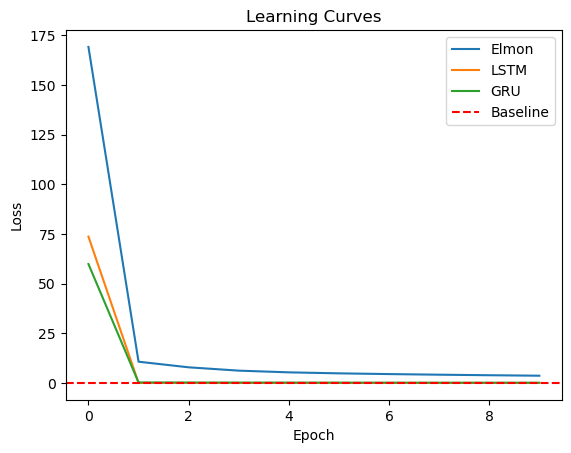

In [54]:
# Plot learning curves

plt.plot(elmon_losses, label='Elmon')
plt.plot(lstm_losses, label='LSTM')
plt.plot(gru_losses, label='GRU')
plt.axhline(y=baseline_loss, color='r', linestyle='--', label='Baseline')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curves')
plt.legend()
plt.show()